# SIT742: Modern Data Science 
**(2021 Assessment Task 01 - Data Manipulation)**

---
- Please refer to the CloudDeakin for the detailed assessment requirements.
- Please submit to Clouddeakin before the due date.
- Students with difficulty in meeting the deadline because of illness, etc. must apply for an assignment extension (up to 3 days) no later than *12:00pm on 16/04/2021 (Friday)*.


Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your information in the following cell. Please make sure you fill your Student ID and Name correctly.  
</div>

**Student Information:** Please fill your information below

- Name:  Hoang Manh Nguyen
- Student ID:  219380205
- Email:  nguyenmanh@deakin.edu.au
- Lab Session and Tutor (for on campus students): 

---

# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. As an employee for Hotel Tulip, working in the Information Technology Division, it is required to prepare a set of documentation for Team-SIT742 to allow them to understand the data being dealt with. Throughout this report, some source codes are to explore the weblog, which afterwards the information is presented to Dr Bear Guts in the format of a report.

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not necessary to stick to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.




## 1.  Data ETL

### 1.1 Data Loading

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from scipy import stats
import matplotlib

 <div class="alert alert-block alert-info">

**Code**: 
    You are required to load Hotel TULIP data into dataframe df_ht and check how many files are loaded.
    <br>
    *Keep the outputs for code in your notebook.
</div>



In [2]:
# Access files in zip file in 'read' mode and obtain information
from zipfile import ZipFile
all_files = ZipFile('HTWebLog_p1.zip','r')
file_infos = all_files.infolist()

# Read all files to create df 

list_ = [] #create empty list to append each log file after reading in for loop
file_counts=0 

for file_info in file_infos:
    
    # Create data frame
    Tlht = pd.read_csv(all_files.open(file_info.filename),error_bad_lines=False,warn_bad_lines=False,
                     encoding='iso-8859-1',header=None,comment="#",delimiter=" ",
                     names=['date','time','s-sitename','s-ip','cs-method','cs-uri-stem','cs-uri-query','s-port','cs-username','c-ip','cs(User-Agent)','cs(Referer)','sc-status','sc-substatus','sc-win32-status']
                    )    
    list_.append(Tlht)

    # Count files loaded:
    file_counts+=1

Tlht = pd.concat(list_) #concatenate all list of log files into 1 dataframe

# Check number of loaded files.

print('The number of loaded files to create data frame is',file_counts)  

# Print the data

Tlht.reset_index(drop=True, inplace=True)
Tlht

The number of loaded files to create data frame is 120


,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200.0,0.0,0.0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200.0,0.0,0.0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8438925,2007-02-28,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/sectionbanner_green...,-,80.0,-,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
8438926,2007-02-28,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/sectionbanner_recru...,-,80.0,-,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
8438927,2007-02-28,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/images/awards.jpg,-,80.0,-,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
8438928,2007-02-28,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/bottom.jpg,-,80.0,-,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0


 <div class="alert alert-block alert-info">

**Code**: 
    Check the data statistics and general information by printing its top 5 rows.
    <br>
    *Keep the outputs for code in your notebook.
</div>

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 1.1** Please include your result for this coding task into your SIT742-DataDictionary.xlsx, then add to your report - Part I with proper section title '1.1.1' and '1.1.2'.
</div>
    </div>


In [3]:
# print top 5 rows
Tlht.head(5)

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200.0,0.0,0.0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200.0,0.0,0.0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0


In [4]:
# General information, shape and size, memory usage
Tlht.info(verbose = True)

Tlht.shape
print('\nThe shape of Tulip hotel dataset is', Tlht.shape)
      
Tlht.size
print('\nThe size of Tulip hotel dataset is', Tlht.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8438930 entries, 0 to 8438929
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   date             object 
 1   time             object 
 2   s-sitename       object 
 3   s-ip             object 
 4   cs-method        object 
 5   cs-uri-stem      object 
 6   cs-uri-query     object 
 7   s-port           float64
 8   cs-username      object 
 9   c-ip             object 
 10  cs(User-Agent)   object 
 11  cs(Referer)      object 
 12  sc-status        float64
 13  sc-substatus     float64
 14  sc-win32-status  float64
dtypes: float64(4), object(11)
memory usage: 965.8+ MB

The shape of Tulip hotel dataset is (8438930, 15)

The size of Tulip hotel dataset is 126583950


### 1.2 Data Cleaning

#### Remove all NAs from data


<div class="alert alert-block alert-warning">

**Code**: 
    1. Check which columns have NAs, <br>
    2. For each of those columns, display the number of NA records, <br> 
    3. emove all records with any NAs.
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 1.2** Please include your result for this coding task into your report Part I, with proper section title '1.2'.
</div>
    </div>


In [5]:
# Find Nan value in dataframe. Beside blanks and NAs, hyphen '-' is considered as NaN.
Tlht = Tlht.replace(['-'],np.nan) #replace all hyphen '-' with NaN

# 1. Check which columns have NAs

NaN_values = Tlht.isna()
NaN_columns = NaN_values.any()
Columns_with_NaN = Tlht.columns[NaN_columns].tolist()

print("The number of columns_have_NAs is", len(Columns_with_NaN),'and they are:\n', Columns_with_NaN)

The number of columns_have_NAs is 15 and they are:
 ['date', 'time', 's-sitename', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query', 's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)', 'sc-status', 'sc-substatus', 'sc-win32-status']


In [6]:
# 2. For each of those columns, display the number of NA records

print('The number of NaNs in each column are:\n',Tlht.isnull().sum())

The number of NaNs in each column are:
 date                     2
time                     2
s-sitename               2
s-ip                     2
cs-method                2
cs-uri-stem              2
cs-uri-query       7886534
s-port                   2
cs-username        8438930
c-ip                     2
cs(User-Agent)        3529
cs(Referer)        1309658
sc-status              758
sc-substatus           758
sc-win32-status        758
dtype: int64


In [7]:
# 3. Remove all records with any NAs in both columns and rows

## Drop columns: cs-uri-query, cs-username, cs(Referer) having more than 15% of NaNs

Tlht_clean=Tlht.drop(columns=['cs-uri-query','cs-username','cs(Referer)'])

## Remove rows having NaNs

Tlht_clean=Tlht_clean.dropna(axis=0, how="any")

# The number of rows before removal NAs

print('The number of rows before NAs removal:',len(Tlht))

# The number of rows after removal NAs

print('\nThe number of rows after NAs removal:',len(Tlht_clean))

print('\nThe number of NAs in each row after removing NAs are:\n',Tlht_clean.isnull().sum())

The number of rows before NAs removal: 8438930

The number of rows after NAs removal: 8434645

The number of NAs in each row after removing NAs are:
 date               0
time               0
s-sitename         0
s-ip               0
cs-method          0
cs-uri-stem        0
s-port             0
c-ip               0
cs(User-Agent)     0
sc-status          0
sc-substatus       0
sc-win32-status    0
dtype: int64


## 2. Data Statistics Description

### 2.1 Traffic Analysis


<div class="alert alert-block alert-warning">

**Code**: 
    Discover on the traffics by analysing hourly requests, then plot it into Bar Chart.
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.1.A** Please include your result for this coding task into your report Part I, with proper section title '2.1.A'.
</div>
    </div>


#### By day and plot 



In [8]:
# Combine 'date' and 'time' to make 'datetime' column and format it to datetime datetype
hourly_request=Tlht_clean.loc[:,['date','time']]
hourly_request["datetime"] = hourly_request["date"] +" "+ hourly_request["time"]
hourly_request['datetime'] = pd.to_datetime(hourly_request['datetime'], format='%Y-%m-%d %H:%M:%S')

# Set 'datetime' as index 
hourly_request=hourly_request.set_index('datetime')
hourly_request.index.names = ['index']

# Group by index.hour
hourly_request_by_hour = hourly_request.groupby(hourly_request.index.hour).size()

# Add new column "Time Value" and rename columns
hourly_request_by_hour = pd.DataFrame(hourly_request_by_hour)
Timevalue=['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
hourly_request_by_hour['Hour'] = Timevalue
hourly_request_by_hour.columns = ['Total requests', 'Hour']
hourly_request_by_hour

,Total requests,Hour
index,,
0,155876,00
1,344287,01
2,432289,02
3,546655,03
4,529352,04
5,487306,05
6,544711,06
7,522365,07
8,550744,08


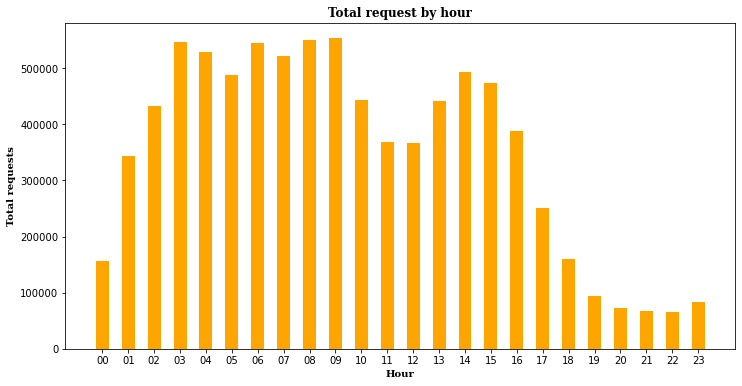

In [9]:
# Create a bar chart of the number of requests by hour of the day

fig = plt.figure(figsize =(12, 6))
x = hourly_request_by_hour['Hour']
y = hourly_request_by_hour['Total requests']
plt.bar(x, y, color ='orange',width = 0.5)
plt.xlabel('Hour',fontweight ='bold', fontfamily='serif',fontsize = 10)
plt.ylabel('Total requests',fontweight ='bold', fontfamily='serif', fontsize = 10)
plt.title("Total request by hour",fontweight ='bold', fontfamily='serif', fontsize = 12)
plt.show()



<div class="alert alert-block alert-warning">

**Code**: 
    You are required to filter the hourly requests by removing any below 490,000 and above 400,000. (hourly_request_amount >= 400000 & hourly_request_amount <= 490000)    
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.1.B** Please include your result for this coding task into your report, with proper section title '2.1.B'.
</div>
    </div>


In [10]:
# Table of filter result (hourly_request_amount >= 400000 & hourly_request_amount <= 490000)

hourly_request_ft= hourly_request_by_hour.loc[(hourly_request_by_hour['Total requests'] >= 400000) 
                                              & (hourly_request_by_hour['Total requests'] <= 490000),['Hour','Total requests']]
hourly_request_ft = pd.DataFrame(hourly_request_ft)
print('The time value which has total request between 400,000 and 490,000 are:\n')
hourly_request_ft

The time value which has total request between 400,000 and 490,000 are:



,Hour,Total requests
index,,
2,02,432289
5,05,487306
10,10,443413
13,13,442414
15,15,472843


### 2.2 Server Analysis

<div class="alert alert-block alert-warning">

**Code**: 
    Discover on the server status using 'sc-status' from DataFrame, then plot it into Pie Chart. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.2** Please include your results for this coding task into your report Part I section '2.2', <br>
    1. How many types of status reported? <br>
    2. Figure 'Server Status' in pie chart. <br>
</div>

In [11]:
# 1. Check how many types of 'sc-status' and their occurances

scstatus = Tlht_clean['sc-status'].value_counts()
scstatus = pd.DataFrame(scstatus)
scstatus.reset_index(inplace=True)
scstatus.columns =['Sc-status','Counts']
print ('Types of status codes are:\n',len(scstatus))
scstatus

Types of status codes are:
 12


,Sc-status,Counts
0,200.0,6071931
1,304.0,2136775
2,404.0,142578
3,206.0,72469
4,302.0,7366
5,500.0,2013
6,403.0,700
7,301.0,433
8,400.0,210
9,501.0,113


#### Server Status

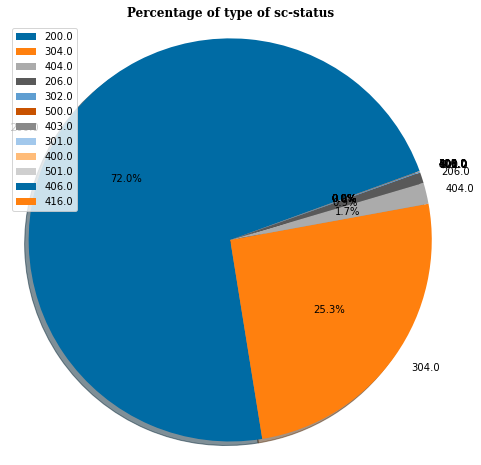

In [12]:
# Draw pie chart of 'sc-status'
plt.figure(figsize =(8, 8))
colors = plt.style.use('tableau-colorblind10')
labels = scstatus['Sc-status']
sizes = scstatus['Counts']
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors,
        shadow=True, startangle=20)
plt.title('Percentage of type of sc-status',fontweight ='bold', fontfamily='serif', fontsize = 12)
plt.legend(prop=dict(size=10))
plt.axis('equal') 
plt.show()

In [13]:
### Addition: Re-group 'sc-status' into status_code group: 2xx,3xx,4xx,5xx and draw pie chart ###

## Group by status types: 2xx,3xx,4xx,5xx 

sc_st =Tlht_clean.loc[:,['sc-status']]
sc_st['Scode_group'] = sc_st['sc-status'].astype(str).str[:1]
sc_st.set_index(['sc-status', 'Scode_group'])
group_sc = sc_st['Scode_group'].value_counts()

## Create df 
group_sc = pd.DataFrame(group_sc)
group_sc.reset_index(inplace=True)
group_sc.columns =['Group','Counts']
group_sc

,Group,Counts
0,2,6144400
1,3,2144574
2,4,143545
3,5,2126


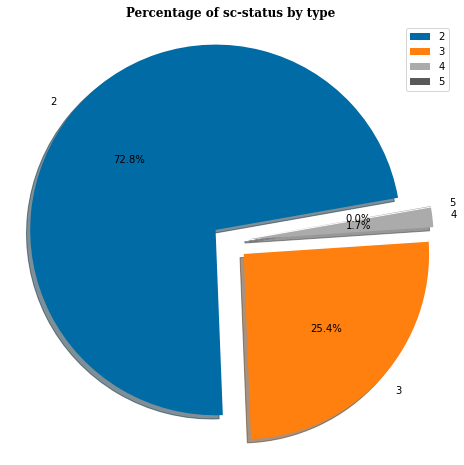

In [14]:
## Draw pie chart of status code based on groups: 2xx,3xx,4xx,5xx

plt.figure(figsize =(8, 8))
color1 = plt.style.use('tableau-colorblind10')
label1 = group_sc['Group']
size1 = group_sc['Counts']
explode1 = (0.1, 0.1, 0.1, 0.1)

plt.pie(size1, explode=explode1, labels=label1, autopct='%1.1f%%', colors=color1,
        shadow=True, startangle=10)
plt.title('Percentage of sc-status by type',fontweight ='bold', fontfamily='serif', fontsize = 12)
plt.legend(prop=dict(size=10))
plt.axis('equal') 
plt.show()

### 2.3 Geographic Analysis

Clinet's IP addresses can reflect geographic information. Since different IP are from different countries even citys, we can find out the demographics information from them. You may use **DbIpCity** from **ip2geotools** to find the geolocation information from given IPs.

**Notes:**
There are some attributes in ip2geotools can help: <br>
*ip_address*: IP address <br>
*city*: city where IP address is located <br>
*region*: region where IP address is located <br>
*country*: country where IP address is located (two letters country code) <br>

#### 2.3.A Requests by Country
<div class="alert alert-block alert-warning">

**Code**: 
    Build your code with the following requirements <br>
    1. Select all requests at 01 Jan 2007 from 20:00:00 pm to 20:59:59. <br>
    2. Discover on the demographics by analysing requests from country level. <br>
    3. Plot countries of all requests in pie chart. <br>
    4. List top 3 with the numbers of requests. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.3.A** Please include your results for this coding task into your report Part I section '2.3.A', <br>
    1. How many requests raised in the period of time? <br>
    2. How many countries are invlolved? <br>
    3. Figure 'Request by Country' in pie chart. <br>
    4. top 3 countries with request numbers. <br>
</div>

In [15]:
# !pip install ip2geotools
from ip2geotools.databases.noncommercial import DbIpCity
import time

In [16]:
# Select all requests at 01 Jan 2007 from 20:00:00 pm to 20:59:59

Hourly_request_01Jan2007 = Tlht_clean.loc[:,['date','time','c-ip']]
Hourly_request_01Jan2007 = Hourly_request_01Jan2007.loc[(Hourly_request_01Jan2007['date']=="2007-01-01")&(Hourly_request_01Jan2007['time']>="20:00:00")&("20:59:59">=Hourly_request_01Jan2007['time']),['date','time','c-ip']]

# 1. Calculate the number of requests raised in the period of time
print ('The number of requests raised in the period of time is:\n', Hourly_request_01Jan2007['c-ip'].count())

The number of requests raised in the period of time is:
 214


In [17]:
# Group by Client ip
Hourly_request_01Jan2007 = Hourly_request_01Jan2007['c-ip'].value_counts()
Hourly_request_01Jan2007

# Create dataframe of 'Client IP' and 'number of requests'
Hourly_request_01Jan2007 = pd.DataFrame(Hourly_request_01Jan2007)
Hourly_request_01Jan2007.reset_index(inplace=True)
Hourly_request_01Jan2007.columns =['Client IP','No of requests']

# Find Country based on Client IP
s_time = time.time()
def IP_info_2(ip):
    try:
        return DbIpCity.get(ip, api_key = 'free').country
    except:
        return np.nan
Hourly_request_01Jan2007['Country'] = Hourly_request_01Jan2007.loc[:, 'Client IP'].apply(IP_info_2)

Hourly_request_01Jan2007.head()

,Client IP,No of requests,Country
0,202.67.207.36,166,HK
1,220.181.18.7,13,CN
2,202.108.23.56,8,CN
3,74.6.76.14,4,US
4,62.211.200.146,3,IT


In [18]:
# 2. How many countries are invlolved?

Request_by_country = Hourly_request_01Jan2007.groupby(['Country']).agg({'No of requests': 'sum'})
Request_by_country = Request_by_country.sort_values(by=['No of requests'], ascending = False)
Request_by_country.reset_index(inplace=True)

print('The number of countries are:', len(Request_by_country))
Request_by_country

The number of countries are: 5


,Country,No of requests
0,HK,169
1,CN,25
2,US,16
3,IT,3
4,AU,1


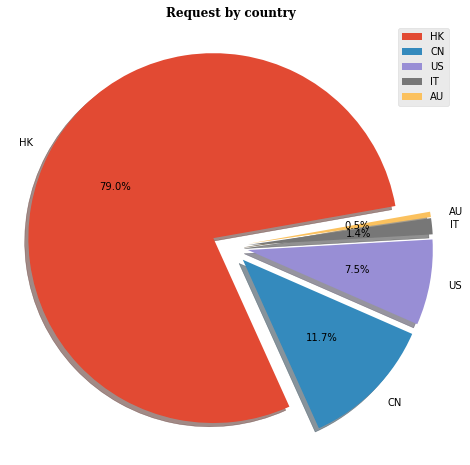

In [19]:
# 3. Draw 'Request by Country' in pie chart.

plt.figure(figsize =(8, 8))
color3 = plt.style.use('ggplot')
label3 = Request_by_country['Country']
size3 = Request_by_country['No of requests']
explode3 = (0.1, 0.1, 0.1, 0.1, 0.1)

plt.pie(size3, explode=explode3, labels=label3, autopct='%1.1f%%', colors=color3,
        shadow=True, startangle=10)
plt.title('Request by country',fontweight ='bold', fontfamily='serif', fontsize = 12)
plt.legend(prop=dict(size=10))
plt.axis('equal') 
plt.show()

In [20]:
# 4. top 3 countries with request numbers.
print('The top 3 countries with highest requests are:\n',Request_by_country.nlargest(3,'No of requests'))

The top 3 countries with highest requests are:
   Country  No of requests
0      HK             169
1      CN              25
2      US              16


#### 2.3.B Requests by City
<div class="alert alert-block alert-warning">

**Code**: 
    Using the selected requests from 2.3.A and build your code with the following requirements <br>
    1. Discover on the demographics by analysing requests from city level. <br>
    2. Plot cities of all requests in pie chart. <br>
    3. List top 3 with the numbers of requests. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.3.B** Please include your results for this coding task into your report Part I section '2.3.B', <br>
    1. How many cites are invlolved? <br>
    2. Figure 'Request by City' in pie chart. <br>
    3. Top 3 cities with request numbers. <br>
</div>

In [21]:
# Discover on the demographics by analysing requests from city level. 

Hourly_request_01Jan2007['City'] = Hourly_request_01Jan2007.apply(lambda row: DbIpCity.get(row['Client IP'],api_key='free').city, axis=1)
Hourly_request_01Jan2007

,Client IP,No of requests,Country,City
0,202.67.207.36,166,HK,Ha Kwai Chung
1,220.181.18.7,13,CN,Beijing
2,202.108.23.56,8,CN,Jinrongjie (Xicheng District)
3,74.6.76.14,4,US,New York
4,62.211.200.146,3,IT,Valcanneto
5,210.184.71.81,2,HK,Hong Kong
6,74.6.85.161,2,US,New York
7,74.6.73.74,1,US,New York
8,74.6.67.102,1,US,New York
9,66.249.65.77,1,US,Mountain View


In [22]:
# 1. How many cites are invlolved?

Request_by_city = Hourly_request_01Jan2007.groupby(['City']).agg({'No of requests': 'sum'})
Request_by_city = Request_by_city.sort_values(by=['No of requests'], ascending = False)
Request_by_city.reset_index(inplace=True)
print('The number of cities are:', len(Request_by_city))
Request_by_city

The number of cities are: 11


,City,No of requests
0,Ha Kwai Chung,166
1,Beijing,15
2,New York,14
3,Jinrongjie (Xicheng District),9
4,Valcanneto,3
5,Hong Kong,2
6,Hangzhou,1
7,Mountain View,1
8,Quarry Bay,1
9,San Francisco (Financial District),1


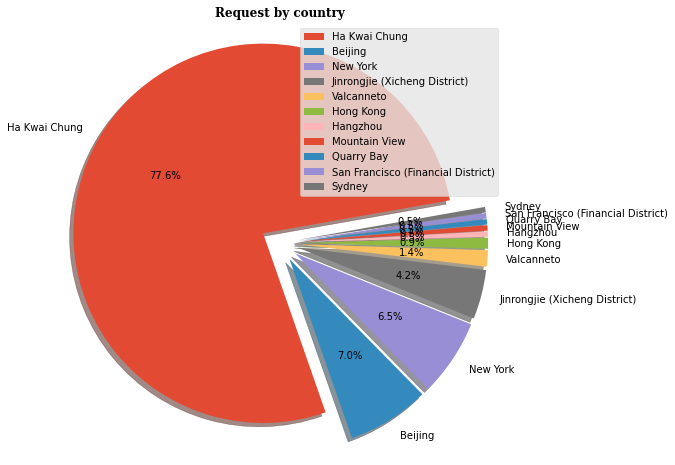

In [23]:
# 2. Draw 'Request by City' in pie chart.

plt.figure(figsize =(8, 8))
color4 = plt.style.use('ggplot')
label4 = Request_by_city['City']
size4 = Request_by_city['No of requests']
explode4 = (0.1, 0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1,0.1)

plt.pie(size4, explode=explode4, labels=label4, autopct='%1.1f%%', colors=color4,
        shadow=True, startangle=10)
plt.title('Request by country',fontweight ='bold', fontfamily='serif', fontsize = 12)
plt.legend(prop=dict(size=10))
plt.axis('equal') 
plt.show()

In [24]:
# 3. top 3 cities with request numbers.
print('The top 3 cities with highest requests are:\n',Request_by_city.nlargest(3,'No of requests'))

The top 3 cities with highest requests are:
             City  No of requests
0  Ha Kwai Chung             166
1        Beijing              15
2       New York              14


# Part II - Web Crawling

## Overview
To better introduce all the professors including the emeritus professor, the professor and also associate professor in Deakin University School of IT, faculty will need to know all the citation information on all professors. Google Scholar is a web search engine that freely indexes the metadata of articles on many authors. Majority of the professors choose to use google scholar to track their publications and research works. Therefore,  the web crawling on google scholar will be able to have the citation information obtained across all the professors (who have the google scholar profile).


## 3. Professor List Generation

### 3.1 Import and install web crawling library. 

<div class="alert alert-block alert-warning">

**Code**: 
    Import and install your web crawling library here. 
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 3.1** Please include your result for this coding task into your report Part II, with proper section title '3.1'.
</div>

*hint: you could use selenium by doing the pip install selenium, download the webdriver for chromedriver and define your webdriver for crawling. But you are free to use any other library*



In [25]:
!pip install -U selenium
!pip install webdriver-manager
!pip install urllib3
!pip3 install scholarly

import csv
import re

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import urllib.request

from scholarly import scholarly
from urllib.request import urlopen

In [26]:
def parse_name(stringtext):
  return " ".join(stringtext.split(" ")[-2:])," ".join(stringtext.split(" ")[:-2])

In [27]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://www.deakin.edu.au/information-technology/staff-listing")



====== WebDriver manager ======
Current google-chrome version is 89.0.4389
Get LATEST driver version for 89.0.4389
Driver [C:\Users\ASUS\.wdm\drivers\chromedriver\win32\89.0.4389.23\chromedriver.exe] found in cache


### 3.2 Find all professors in School of IT and save it as csv. 

<div class="alert alert-block alert-warning">

**Code**: 
    Find all professors in Schoolf of IT and save it as csv. The csv must have the full name of the professor (in one column), the title of the professor and University Name.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 3.2** Please include your result for this coding task into your report Part II, with proper section title '3.2'.
</div>



*hint: the url of the staff list for school of IT is https://www.deakin.edu.au/information-technology/staff-listing. you may need to iteratively find out html tag by table in the page to start crawl all the text from td (td is the elements in html table, check https://www.w3schools.com/html/html_tables.asp)*

In [28]:
Name_Prof = driver.find_elements_by_xpath('//td[@headers="table09355r1c1"]')

In [29]:
## Step 1:
# Create empty file of prof name without parse_name
with open('Prof_list0.csv', 'w') as f:
    for i in range(len(Name_Prof )):
        f.write(str(parse_name(Name_Prof[i].text)) + '\n')
        
f.close()

# Apply parse_name function

with open('Prof_list0.csv', 'r') as f:
    file_staff = open('Prof_list1.csv', 'w')
    for line in f:
        values = line.split(',')
        name = values[0].strip("('')")
        title = re.sub(r'\W+', ' ', values[1])
        file_staff.write(name + ' ' + title +'\n')
        
file_staff.close()        

# Save file

with open('Prof_list1.csv', 'r') as a:
    dataline = a.readlines()
prof_list = open('Prof_list2.csv','w')
for i in range(0,25):
    line = dataline[i].strip('\n')
    prof_list.write(line + ' ' + '\n')
prof_list.close()

In [30]:
## Step 2:
# Read file
prof_trial = pd.read_csv('Prof_list2.csv', 
                           names = ['First Name', 'Last Name', 'Title 1', 'Title 2'], 
                           delim_whitespace = True)

# Drop NA
prof_trial = prof_trial .replace(np.nan, '', regex=True)

# Format the table
prof_trial['Name'] = prof_trial[['First Name', 'Last Name']].apply(lambda x: ' '.join(x), axis=1)

prof_trial['Title'] = prof_trial[['Title 1', 'Title 2']].apply(lambda x: ' '.join(x), axis=1)

prof_only = prof_trial.drop(prof_trial.columns[[0, 1, 2, 3]], axis=1) 

prof_only['University'] = 'Deakin University'
prof_only

,Name,Title,University
0,Lynn Batten,Emeritus Professor,Deakin University
1,Andrzej Goscinski,Emeritus Professor,Deakin University
2,Jemal Abawajy,Professor,Deakin University
3,Maia Angelova,Professor,Deakin University
4,Gleb Beliakov,Professor,Deakin University
5,Terry Caelli,Professor,Deakin University
6,Jinho Choi,Professor,Deakin University
7,Chang-Tsun Li,Professor,Deakin University
8,Robin Doss,Professor,Deakin University
9,Peter Eklund,Professor,Deakin University


In [31]:
# Save to csv
prof_only.to_csv('Professor-list.csv', index=False)

## 4. Professor Citation Information Generation


### 4.1 Search the google scholar for all professors 

<div class="alert alert-block alert-warning">

**Code**: 
    Search the google scholar for all professors and obtain their citations-all, h-index-all, i10-all, citation-since2016,h-index-2016 and i10-since2016. Save the results as csv and must having **all the professors name, title and all 6 citation information.**
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.1** Please include your result for this coding task into your report Part II, with proper section title '4.1'.
</div>


*hint: if the professors did not have the google scholar profle with the name, save the 6 citation information as string "na". you could use the while loop with condition or for loop with if condition or for loop with defined method having if condition to deal with those professors do not have google scholar*

In [33]:
# Search the google scholar
with open('Professor-citation0.csv', 'w') as f:
    for i in range(len(prof_only['Name'])):
        search_query = scholarly.search_author(prof_only['Name'][i])
        author = next(search_query, None)
        if author is None:
            f.write(prof_only['Name'][i] + ' '+ 'Na' + ' '+ 'Na' + ' '+ 'Na' + ' ' + 'Na' + ' ' + 'Na' + ' ' + 'Na' + '\n')
        else:
            x = scholarly.fill(author, sections=['basics', 'indices', 'coauthors'])
            name = prof_only['Name'][i]
            citedby =  str(author['citedby'])
            citedby5y = str(x['citedby5y'])
            hindex   =  str(x['hindex'])
            hindex5y   =     str(x['hindex5y'])
            i10index   =   str(x['i10index'])
            i10index5y    =    str(x['i10index5y'])
            
            f.write(name +' '+citedby+' '+citedby5y+' '+hindex+' '+hindex5y+' '+i10index+' '+i10index5y+'\n')
f.close()

In [35]:
# Read file 
prof_cit = pd.read_csv('Professor-citation0.csv', names =['First Name', 'Last Name', 
                                                            'citation-all', 'citation-since2016', 
                                                            'h-index-all', 'h-index-since2016', 
                                                            'i10-index-all', 'i10-index-since2016'], 
                                                            delim_whitespace = True)

# Remove First and Last Name
prof_cit = prof_cit.drop(prof_cit.columns[[0, 1]], axis=1) 

# Combine 2 dataframe prof_only and prof_cit
all_cit = pd.concat([prof_only,prof_cit], axis=1)

# Remove University
all_cit = all_cit.drop(all_cit.columns[[2]], axis=1) 

# Save to 'Professor-citation-information.csv'
all_cit.to_csv('Professor-citation-information.csv', index=False)

In [37]:
# Format table
prof_citation = all_cit.replace('Na', 0)

prof_citation[['citation-all', 'citation-since2016', 'h-index-all', 'h-index-since2016', 'i10-index-all', 
               'i10-index-since2016']]  = prof_citation[['citation-all', 'citation-since2016', 
                                                         'h-index-all', 'h-index-since2016', 
                                                         'i10-index-all', 'i10-index-since2016']].astype(int)
prof_citation

,Name,Title,citation-all,citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
0,Lynn Batten,Emeritus Professor,2535,1179,23,16,45,21
1,Andrzej Goscinski,Emeritus Professor,0,0,0,0,0,0
2,Jemal Abawajy,Professor,0,0,0,0,0,0
3,Maia Angelova,Professor,682,399,15,11,21,14
4,Gleb Beliakov,Professor,8182,4640,42,32,135,87
5,Terry Caelli,Professor,8669,1477,52,20,177,36
6,Jinho Choi,Professor,20442,7025,71,39,315,173
7,Chang-Tsun Li,Professor,4347,2341,33,21,104,65
8,Robin Doss,Professor,0,0,0,0,0,0
9,Peter Eklund,Professor,3968,783,34,14,72,23


### 4.2 Find out the professor name having the most citations 

<div class="alert alert-block alert-warning">

**Code**: 
    Find out the professor name having the most citations (please remove those professor who does not have google scholar page)
</div>

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.2** Please include your result for this coding task into your report Part II, with proper section title '4.2'.
</div>


In [40]:
# Professors have the most citations
prof_citation.loc[prof_citation['citation-all'].idxmax()]

Name                               Gang Li
Title                  Associate Professor
citation-all                         64452
citation-since2016                   30686
h-index-all                             75
h-index-since2016                       60
i10-index-all                          144
i10-index-since2016                    130
Name: 20, dtype: object

### 4.3 Find out the row for associate professor having the most i10-index since 2016 
<div class="alert alert-block alert-warning">

**Code**: 
    Find out the row for associate professor having the most i10-index since 2016 (please remove those professor who does not have google scholar page)
</div>


<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.3** Please include your result for this coding task into your report Part II, with proper section title '4.3'.
</div>


In [42]:
# Associate professors have the most i10_index since 2016
prof_citation.nlargest(1, 'i10-index-since2016')

,Name,Title,citation-all,citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
6,Jinho Choi,Professor,20442,7025,71,39,315,173


### 4.4 Find out all the professors name who has the citations_since2016 > 2500
<div class="alert alert-block alert-warning">

**Code**: 
    Find out the row for associate professor having the most i10-index since 2016 (please remove those professor who does not have google scholar page)
</div>

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.4** Please include your result for this coding task into your report Part II, with proper section title '4.4'.
</div>


In [45]:
# Professors have the citations_since2016 > 2500
prof_citation.loc[(prof_citation['citation-since2016'] > 2500)]

,Name,Title,citation-all,citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
4,Gleb Beliakov,Professor,8182,4640,42,32,135,87
6,Jinho Choi,Professor,20442,7025,71,39,315,173
10,Seng Loke,Professor,7188,2913,38,21,126,50
13,Yong Xiang,Professor,13627,6573,57,38,161,121
15,Arkady Zaslavsky,Professor,14966,8361,50,33,177,80
17,Andrew Cain,Associate Professor,3195,2935,17,16,23,21
20,Gang Li,Associate Professor,64452,30686,75,60,144,130
21,Jianxin Li,Associate Professor,6024,4328,43,34,117,105
22,Xiao Liu,Associate Professor,24444,18033,36,35,53,52
